importing Jupyter notebook from data_processing.ipynb


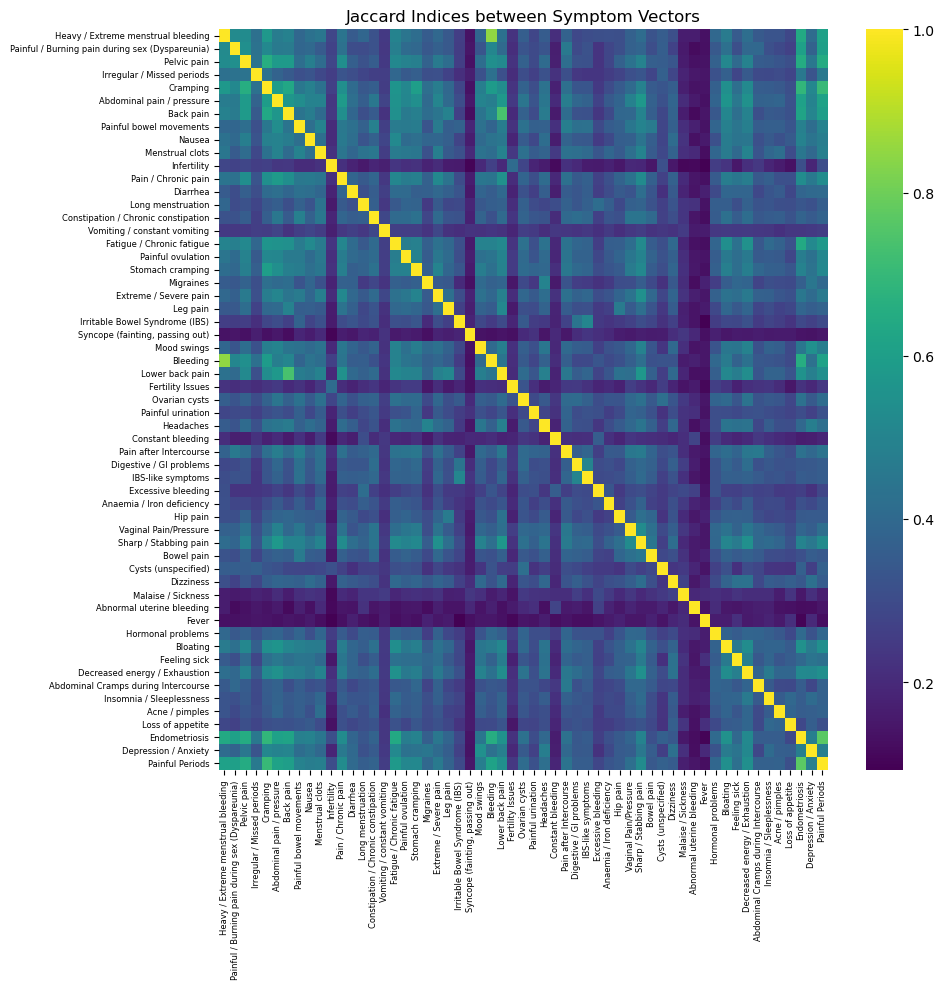

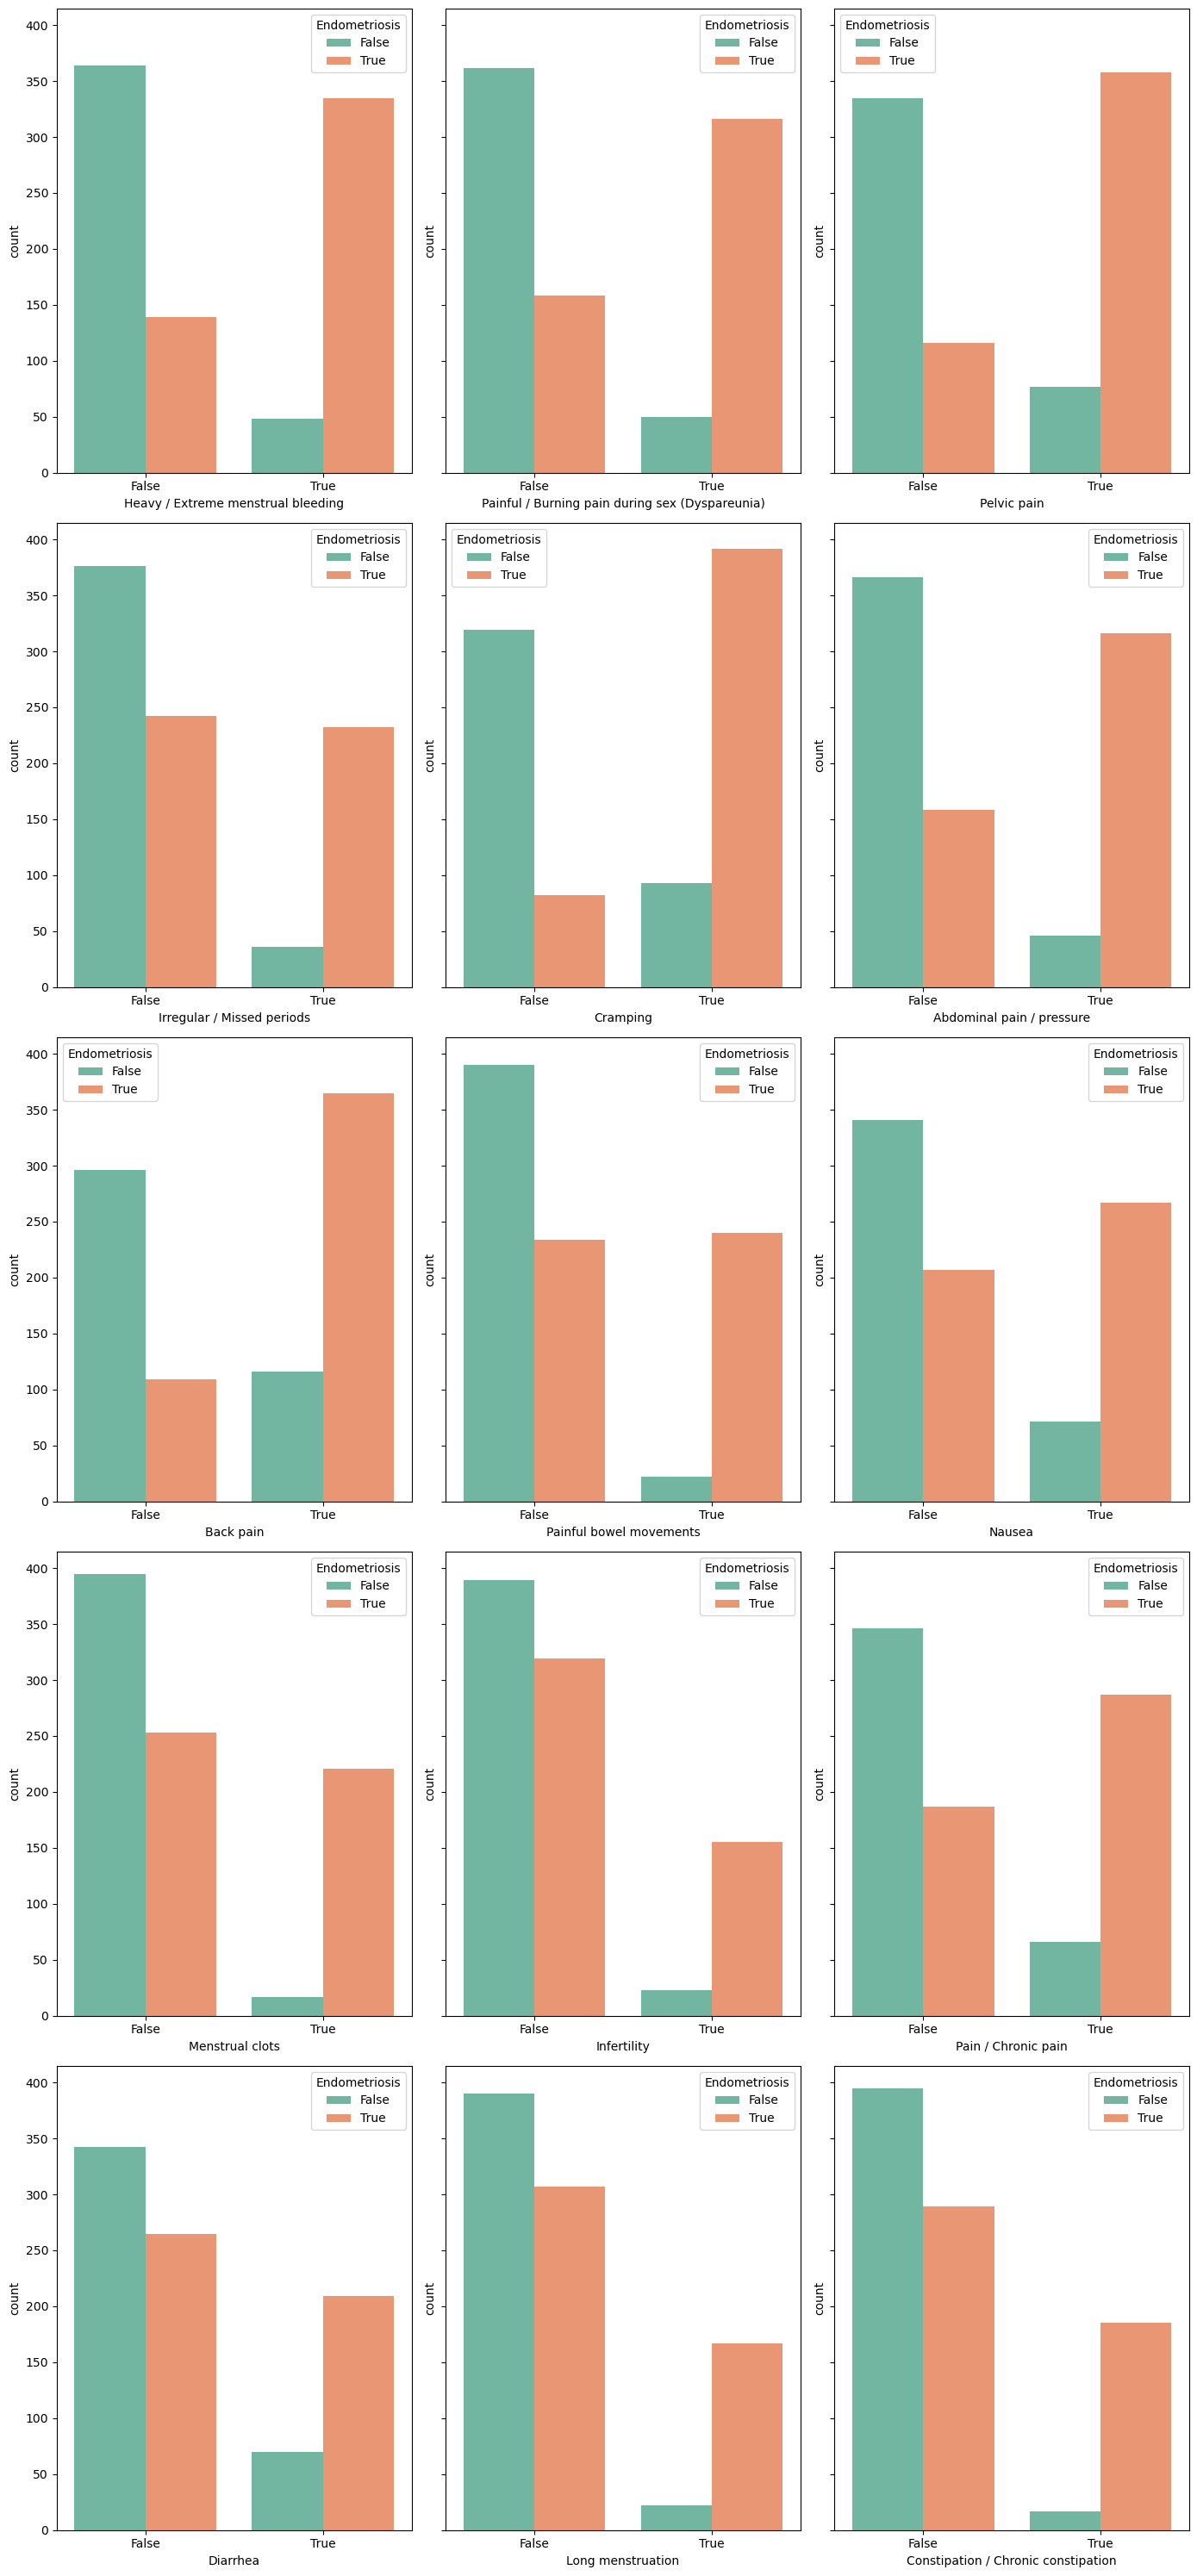

Recall - Mean: 0.8919, Std: 0.0401
Specificity - Mean: 0.8580, Std: 0.0672
Precision - Mean: 0.8763, Std: 0.0497
F1-score - Mean: 0.8827, Std: 0.0300
Accuracy - Mean: 0.8757, Std: 0.0339
AUC - Mean: 0.8750, Std: 0.0349
Top 5 Most Important Features:
                      Feature  Importance
55            Painful Periods    0.536208
16  Fatigue / Chronic fatigue    0.054535
41        Cysts (unspecified)    0.039391
26            Lower back pain    0.037201
28              Ovarian cysts    0.027674
the mmc is equal to  0.7590099477928969


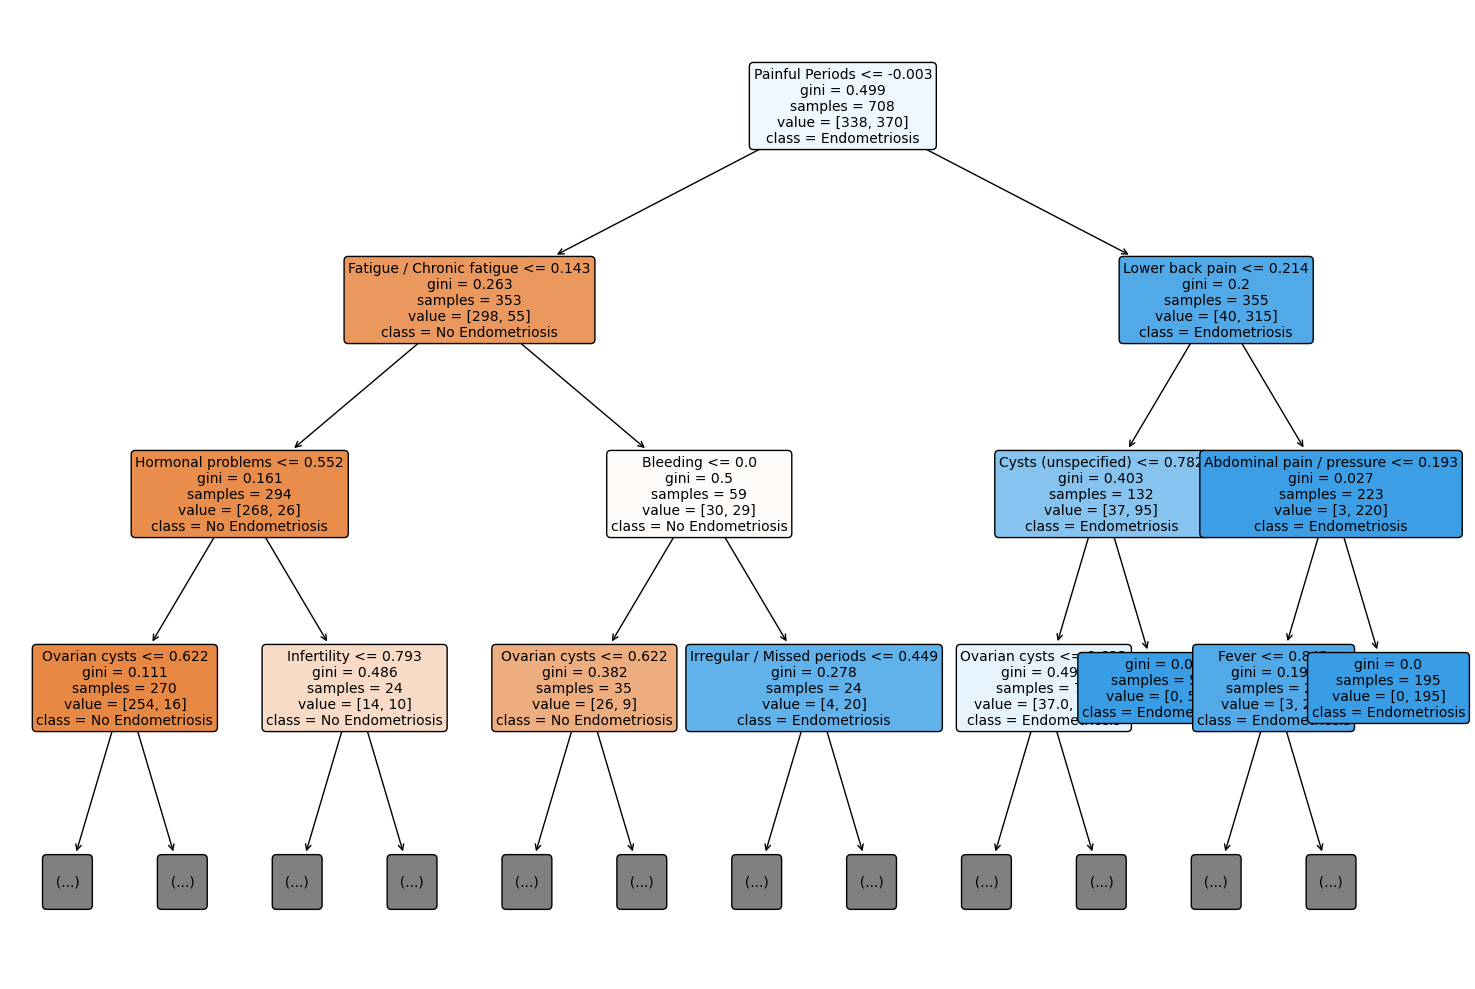

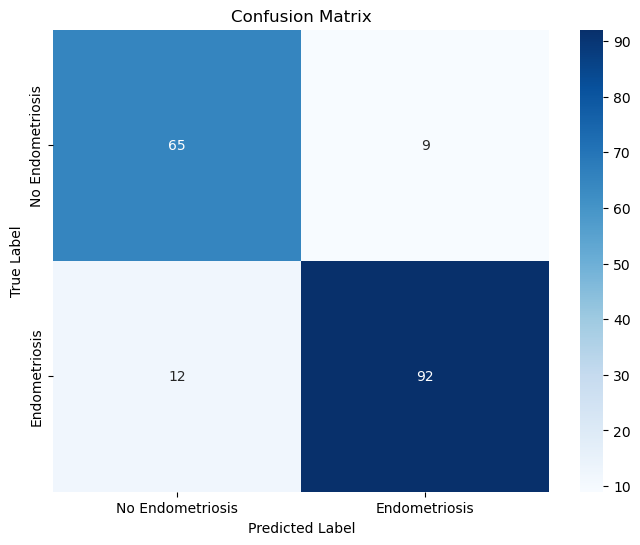

In [1]:
import import_ipynb
from data_processing import *
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,confusion_matrix,matthews_corrcoef


X = data.drop('Endometriosis', axis=1)
y = data['Endometriosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Define metrics functions
scoring = {
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(recall_score, pos_label=0),  # Assuming 0 is the negative class
    'Precision': make_scorer(precision_score),
    'F1-score': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calculate cross-validated scores
cv_results = cross_validate(decision_tree_model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Display mean and standard deviation for each metric
for metric in scoring.keys():
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f'{metric} - Mean: {mean_score:.4f}, Std: {std_score:.4f}')


# Print most important features 
feature_importances = decision_tree_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print("Top 5 Most Important Features:")
print(features_df.head(5)) 

from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=['No Endometriosis', 'Endometriosis'], rounded=True, fontsize=10,max_depth=3)
plt.tight_layout()
path = os.path.join('', 'decision_tree.svg')
plt.savefig(path)


y_pred = decision_tree_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print("the mmc is equal to ", mcc)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Endometriosis', 'Endometriosis'],
            yticklabels=['No Endometriosis', 'Endometriosis'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
path = os.path.join('', 'confusion_matrix.svg')
plt.savefig(path)




